## ***LAB 9 : Naive Bayes Classifier***

  1. Binary Classification using Naive Bayes Classifier
  
  2. Sentiment Analysis using Naive Bayes

  


In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Binary Classification using Naive Bayes Classifier

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

Text(0.5, 1.0, 'Data visualization')

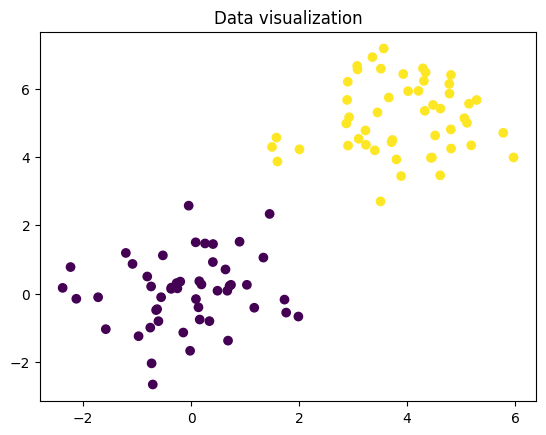

In [23]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')


2. Split the Dataset by Class Values (Create a Dictionary)

In [24]:

import pandas
def class_dictionary(data: np.ndarray, label: np.ndarray) -> pandas.DataFrame:
    data1 = data[np.where(label == 0)]
    data2 = data[np.where(label == 1)]
    dataset = pandas.DataFrame({'Lable 0': dict(enumerate(data1)), 'Lable 1': dict(enumerate(data2))})
    return dataset

df = class_dictionary(data, label)
print(df['Lable 0'])

0      [-1.5766898498109918, -1.0398226180535974]
1        [-2.2290883728182354, 0.777385341420626]
2      [-0.7294401424182014, -2.0405960058045194]
3      [-0.6030709264745643, -0.8061379304575134]
4      [-0.19888869928702047, 0.3519869977892473]
5        [-1.082381897285784, 0.8687307543819514]
6      [-0.6460227649981973, -0.4827786001733742]
7     [-0.5530133270230154, -0.10534224000978794]
8       [-0.9704143490174237, -1.245663043373122]
9       [0.3407676181772857, -0.8051220612456715]
10       [1.4548872377471582, 2.3318086042047077]
11      [-0.1432236121718621, -1.138942473862656]
12     [-0.7076769270859744, -2.6589132346130815]
13    [0.09163131920609444, -0.15950216856263935]
14      [-2.12241531690744, -0.15106366120793535]
15     [-0.3685912165152009, 0.13876704370863305]
16      [1.9871581976060144, -0.6703591339181066]
17      [0.15313647860892712, 0.3629006324860355]
18       [-1.71898891150744, -0.1058270655127238]
19     [0.49004010574872753, 0.08445840570575937]


3. Calculate Mean, Std deviation and count for each column in a dataset

In [25]:

def get_variables(dataset: pandas.DataFrame) -> dict:
  Lable_0 = {}
  Lable_1 = {}

  Lable_0['mean'] = np.mean(dataset['Lable 0'])
  Lable_0['std']  = np.array(dataset['Lable 0']).std()
  Lable_0['count'] = dataset['Lable 0'].count()

  Lable_1['mean'] = np.mean(dataset['Lable 1'])
  Lable_1['std']  = np.array(dataset['Lable 1']).std()
  Lable_1['count'] = dataset['Lable 1'].count()

  return Lable_0 , Lable_1

var0, var1 = get_variables(df)
#print(var1['mean'])


In [26]:
print(var1)

{'mean': array([3.89129353, 5.13647498]), 'std': array([1.02082994, 1.03546734]), 'count': 50}


In [27]:
x = list(enumerate(df['Lable 0'][1]))
print(df['Lable 0'][1])
print(x)

[-2.22908837  0.77738534]
[(0, -2.2290883728182354), (1, 0.777385341420626)]


3. Calculate Class Probabilities

In [28]:
import numpy
## calculate P(xi/ Y=y)
def guassian_dim(x: float, mean: float, std: float) -> float:

    exp_pow = -(1/2)*(x-mean)**2 / (std)**2
    A = np.exp(exp_pow)
    B = ( 1 / (np.sqrt(2*numpy.pi)*std) ) 

    return B * A

def calculate_class_prob(model: dict, data: numpy.ndarray, other_model: dict) -> numpy.ndarray: ## calculate prob of data belonging to given model
    ## Calculation of P(data/Y) for each point of data
    Prob = []

    if data.shape == (2,):
        data = [data]

    for x in data:
        class_prob = 1

        likelihood_model = 1
        likelihood_other_model = 1
        priori_model = model['count']/(model['count'] + other_model['count'])

        for i, xi in enumerate(x):
            likelihood_model *= guassian_dim(xi, model['mean'][i], model['std'][i])
            likelihood_other_model *= guassian_dim(xi, other_model['mean'][i], other_model['std'][i])

        class_prob = (likelihood_model * priori_model) / (likelihood_model + likelihood_other_model)

        Prob.append(class_prob)

    return Prob

def predict(model0, model1, data):
    pred = []
    prob0 = calculate_class_prob(model0, data, model1)
    prob1 = calculate_class_prob(model1, data, model0)

    if len(prob0) != len(prob1):
        return "error"

    for i in range(len(prob0)):
        if prob0[i] - prob1[i] >= 0:
            pred.append(0)
        else:
            pred.append(1) 

    return pred

4. Test the model using some samples

Text(0.5, 1.0, 'Data visualization')

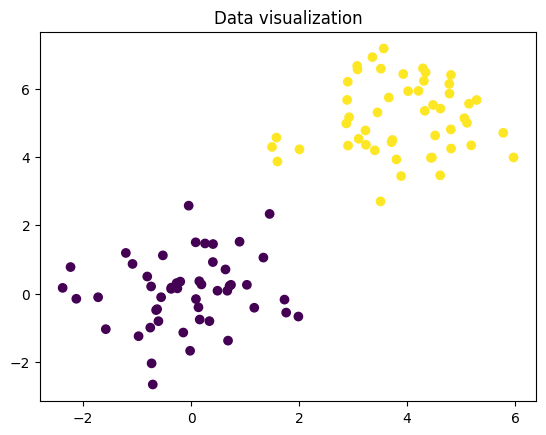

In [29]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])

data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))


plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

Testing for a sample point

In [30]:
class_dict = class_dictionary(data,label)
var0, var1 = get_variables(class_dict)
out = predict(var0, var1, numpy.array(df['Lable 0'][5]))
print(out)

[0]


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


In [31]:
y_pred = np.array(predict(var0, var1, test_data), dtype=float)
from sklearn.metrics import accuracy_score

print(f'Accuracy of model is {accuracy_score(y_test, y_pred)}')

Accuracy of model is 1.0


In [32]:
print(y_pred)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
nb=GaussianNB()
nb.fit(data,label)
y_predict=nb.predict(test_data)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_predict))

1.0
[[10  0]
 [ 0 10]]


## Sentiment Analysis using Naive Bayes Classifier##

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

In [34]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/abhishekj/.local/lib/python3.9/site-packages
sysconfig: /home/abhishekj/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('./train.csv')

In [36]:
def preprocess_data(data):
    data = data.drop('package_name', axis=1)
    data['review'] = data['review'].str.strip().str.lower()
    return data

data = preprocess_data(data)

In [37]:

x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)


vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

print(model.score(x_test, y_test))

print(model.predict(vec.transform(['i love this app! this is so amazing!!'])))

0.8565022421524664
[1]


In [38]:
model.predict(vec.transform(['This app is so amazing! It can melt my brain in 2 seconds!!']))

array([1])